### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/platforms-and-tools/blob/main/PyCaret/PyCaret-ClassificationDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


Source: 
1. https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb
2. https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb
3. https://pycaret.gitbook.io/docs/get-started/quickstart#classification
4. https://pycaret.readthedocs.io/en/stable/api/classification.html PyCaret2.0
5. https://pycaret.readthedocs.io/en/latest/installation.html PyCaret3.0
6. https://towardsdatascience.com/pycaret-3-0-is-coming-soon-whats-new-e890e6a69ff5

# How to do Classification with PyCaret

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered. Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative). This module can be used for binary or multiclass problems.

PyCaret's Calssification module has over over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.
In this notebook, we will explore: 


* **Getting Data**: How to import data from PyCaret dataset
* **Normalization**: How to normalize and scale the dataset
* **Transformation**: How to apply transformations that make the data linear and approximately normal
* **Ignore Low Variance**: How to remove features with statistically insignificant variances to make the experiment more efficient
* **Remove Multi-collinearity**: How to remove multi-collinearity from the dataset to boost performance of Linear algorithms
* **Group Features**: How to extract statistical information from related features in the dataset
* **Combine Rare Levels**: How to combine rare levels in categorical features
* **Bin Numeric Variables**: How to bin numeric variables and transform numeric features into categorical ones using 'sturges' rule
* **Setting up Environment**: How to setup an experiment in PyCaret and get started with building regression models
* **Create Model**: How to create a model, perform cross validation and evaluate regression metrics
* **Tune Model**: How to automatically tune the hyperparameters of a regression model
* **Plot Model**: How to analyze model performance using various plots
* **Finalize Model**: How to finalize the best model at the end of the experiment
* **Predict Model**: How to make prediction on new / unseen data
* **Model Ensembling and Stacking**: How to boost model performance using several ensembling techniques such as Bagging, Boosting, Soft/hard Voting and Generalized Stacking
* **Save / Load Model**: How to save / load a model for future use
* **Experiment Logging**: How to log experiments in PyCaret using MLFlow backend

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [ ]:
#only if you want to run it in Google Colab: 

# !pip install pycaret[full]

ERROR: unknown command " install --pre pycaret[full]"



In [5]:
# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.0.0.rc4'

# Importing Dataset

In [6]:
from pycaret.datasets import get_data

#here is the list of all available datasets
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [20]:
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [ ]:
# dataset = get_data('credit', profile=True) # profile=True is going to do an automated EDA, you need to "pip install pycaret[analysis]" first. 

In [21]:
# for the sake of time, let's work wity a tiny subsample of data
dataset = dataset.sample(2000)

In [22]:
data = dataset.sample(frac=0.9, random_state=123)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1800, 24)
Unseen Data For Predictions: (200, 24)


In [23]:
data.shape

(1800, 24)

In [24]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,300000,2,1,2,31,0,0,0,-1,-1,...,658.0,662.0,0.0,1000.0,2700.0,658.0,662.0,0.0,0.0,0
1,100000,1,2,2,26,2,2,2,2,-2,...,23000.0,25000.0,0.0,14002.0,560.0,0.0,2000.0,0.0,53528.0,0
2,200000,1,2,2,46,0,0,0,0,0,...,80248.0,64174.0,51204.0,60000.0,20000.0,20248.0,45000.0,40000.0,54600.0,0
3,120000,2,2,1,35,0,0,0,0,-2,...,0.0,0.0,0.0,1550.0,1000.0,0.0,0.0,0.0,0.0,0
4,150000,2,1,1,35,-1,-1,-1,-2,-1,...,9643.0,4383.0,2225.0,2698.0,3137.0,9643.0,4395.0,2229.0,3041.0,0


In [25]:
data.nunique()

LIMIT_BAL      57
SEX             2
EDUCATION       5
MARRIAGE        4
AGE            48
PAY_1          10
PAY_2           9
PAY_3           8
PAY_4           8
PAY_5           8
PAY_6           8
BILL_AMT1    1605
BILL_AMT2    1575
BILL_AMT3    1567
BILL_AMT4    1524
BILL_AMT5    1507
BILL_AMT6    1471
PAY_AMT1      920
PAY_AMT2      901
PAY_AMT3      846
PAY_AMT4      784
PAY_AMT5      758
PAY_AMT6      756
default         2
dtype: int64

In [26]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [27]:
categoricals = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6' ]
numericals   = ['AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


## Setting up Environment in PyCaret

**setup()**:

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

In [15]:
from pycaret.classification import *


The latest version of PyCaret is Object oriented API. This means that the settings are linked with an object, you can run as many experiments as you want in the same notebook and compare them seamlessly not just across different modeling options but also different preprocessing settings.


In [28]:
# experience1 = no preprocessing
exp1 = ClassificationExperiment() 
exp1.setup(data,  target='default', session_id=555, train_size=0.7, preprocess=False, categorical_features= categoricals, numeric_features=numericals)



,Description,Value
0,Session id,555
1,Target,default
2,Target type,Binary
3,Original data shape,"(1800, 24)"
4,Transformed data shape,"(1800, 24)"
5,Transformed train set shape,"(1259, 24)"
6,Transformed test set shape,"(541, 24)"
7,Numeric features,13
8,Categorical features,9


In [29]:
# experiment 2, with preprocessing and more!!!
exp2 = ClassificationExperiment() 
exp2.setup(data, target='default', session_id=555, train_size=0.7, categorical_features= categoricals, numeric_features=numericals, numeric_imputation='mean', categorical_imputation='mode' ,
           preprocess=True, normalize=True , transformation=True,
           group_features = [['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
                                   ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']],
           remove_multicollinearity=True, multicollinearity_threshold=0.95,  remove_outliers=True)


,Description,Value
0,Session id,555
1,Target,default
2,Target type,Binary
3,Original data shape,"(1800, 24)"
4,Transformed data shape,"(1754, 19)"
5,Transformed train set shape,"(1202, 19)"
6,Transformed test set shape,"(541, 19)"
7,Ordinal features,1
8,Numeric features,13
9,Categorical features,9


## Compare Models

This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [30]:
top3_exp1 = exp1.compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8173,0.7234,0.3512,0.6717,0.4575,0.3612,0.3903,0.0490
gbc,Gradient Boosting Classifier,0.8173,0.7204,0.3587,0.6634,0.4635,0.3657,0.3916,0.0500
ada,Ada Boost Classifier,0.8118,0.7140,0.3516,0.6417,0.4509,0.3496,0.3741,0.0250
lda,Linear Discriminant Analysis,0.8070,0.6934,0.2725,0.6635,0.3801,0.2905,0.3327,0.0070
et,Extra Trees Classifier,0.8030,0.7085,0.3225,0.6205,0.4178,0.3138,0.3412,0.0380
xgboost,Extreme Gradient Boosting,0.8030,0.6935,0.3585,0.6087,0.4451,0.3352,0.3558,0.0420
ridge,Ridge Classifier,0.8022,0.0000,0.1974,0.7030,0.3018,0.2285,0.2925,0.0070
lightgbm,Light Gradient Boosting Machine,0.7990,0.7067,0.3552,0.5919,0.4371,0.3248,0.3440,0.0220
lr,Logistic Regression,0.7784,0.6150,0.0000,0.0000,0.0000,0.0000,0.0000,0.0160
dummy,Dummy Classifier,0.7784,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070


In [31]:
top3_exp2 = exp2.compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8102,0.7259,0.3512,0.6409,0.4483,0.3458,0.3712,0.0790
lda,Linear Discriminant Analysis,0.8086,0.7134,0.2939,0.6613,0.4044,0.3098,0.3474,0.0340
gbc,Gradient Boosting Classifier,0.8078,0.7303,0.3478,0.6226,0.4437,0.3391,0.3613,0.0650
lightgbm,Light Gradient Boosting Machine,0.8078,0.7101,0.3939,0.6095,0.4768,0.3653,0.3796,0.0450
lr,Logistic Regression,0.8046,0.7152,0.2545,0.6677,0.3642,0.2753,0.3222,0.4330
et,Extra Trees Classifier,0.8046,0.7295,0.3188,0.6250,0.4170,0.3149,0.3429,0.0680
ridge,Ridge Classifier,0.8014,0.0000,0.2151,0.6799,0.3242,0.2420,0.2991,0.0280
ada,Ada Boost Classifier,0.7991,0.7036,0.3081,0.6030,0.4031,0.2974,0.3240,0.0520
xgboost,Extreme Gradient Boosting,0.7887,0.6947,0.3652,0.5375,0.4337,0.3096,0.3191,0.0640
knn,K Neighbors Classifier,0.7871,0.6681,0.2508,0.5482,0.3425,0.2360,0.2626,0.0380


## Create Model

This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [32]:
rf = exp1.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7698,0.7405,0.1786,0.4545,0.2564,0.1498,0.1728
1,0.8413,0.7793,0.4643,0.7222,0.5652,0.4737,0.4910
2,0.8175,0.7923,0.3929,0.6471,0.4889,0.3858,0.4036
3,0.8254,0.7773,0.3214,0.7500,0.4500,0.3654,0.4119
4,0.8333,0.6911,0.3571,0.7692,0.4878,0.4038,0.4463
5,0.8016,0.6011,0.3214,0.6000,0.4186,0.3119,0.3340
6,0.8492,0.7225,0.3571,0.9091,0.5128,0.4430,0.5110
7,0.8254,0.7203,0.4286,0.6667,0.5217,0.4211,0.4364
8,0.7937,0.6811,0.3571,0.5556,0.4348,0.3158,0.3273


## Tune model

This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [34]:
tuned_rf = exp1.tune_model(rf, optimize = 'f1')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8438,0.6786,0.5938,0.6333,0.5194,0.5214
1,0.8175,0.8116,0.6071,0.5862,0.5965,0.4786,0.4787
2,0.8016,0.8074,0.5357,0.5556,0.5455,0.4186,0.4187
3,0.8016,0.7682,0.5000,0.5600,0.5283,0.4032,0.4042
4,0.8175,0.7952,0.6429,0.5806,0.6102,0.4914,0.4925
5,0.7937,0.6981,0.3929,0.5500,0.4583,0.3352,0.3425
6,0.8571,0.7792,0.5714,0.7273,0.6400,0.5525,0.5587
7,0.7778,0.7646,0.5000,0.5000,0.5000,0.3571,0.3571
8,0.7302,0.6634,0.3571,0.3846,0.3704,0.1990,0.1992


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [35]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=555, verbose=0, warm_start=False)

In [36]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_samples_leaf=4,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=210, n_jobs=-1, oob_score=False,
                       random_state=555, verbose=0, warm_start=False)

## Plot Model

This function analyzes the performance of a trained model on holdout set. It may require re-training the model in certain cases

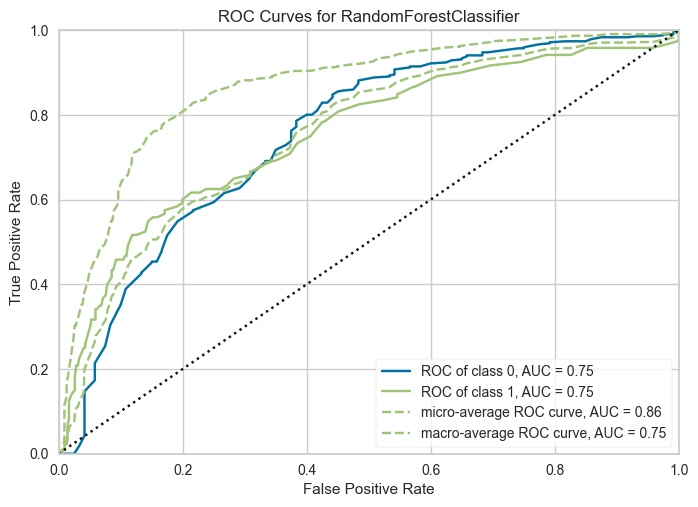

In [37]:
exp1.plot_model(rf, plot = 'auc')

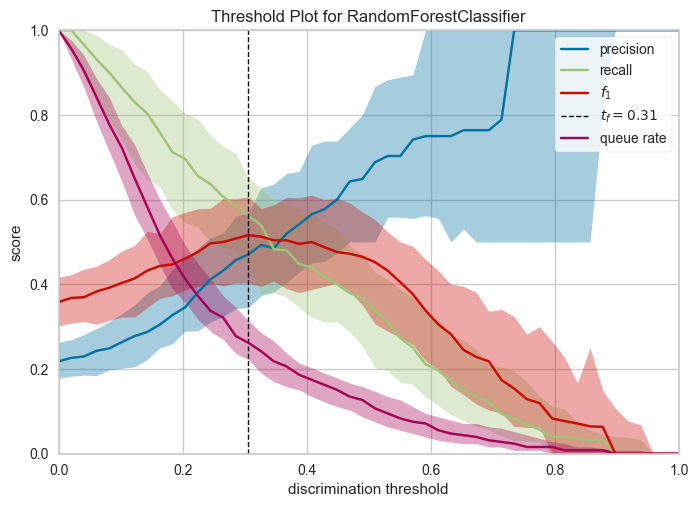

In [38]:
exp1.plot_model(rf, plot = 'threshold')

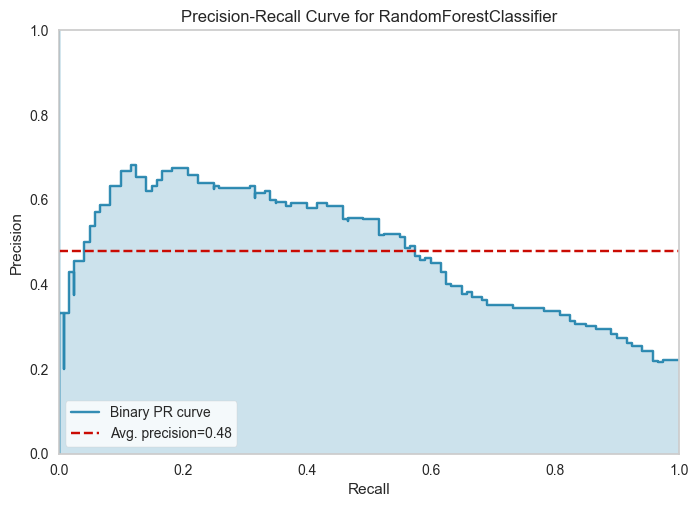

In [39]:
exp1.plot_model(rf, plot = 'pr')

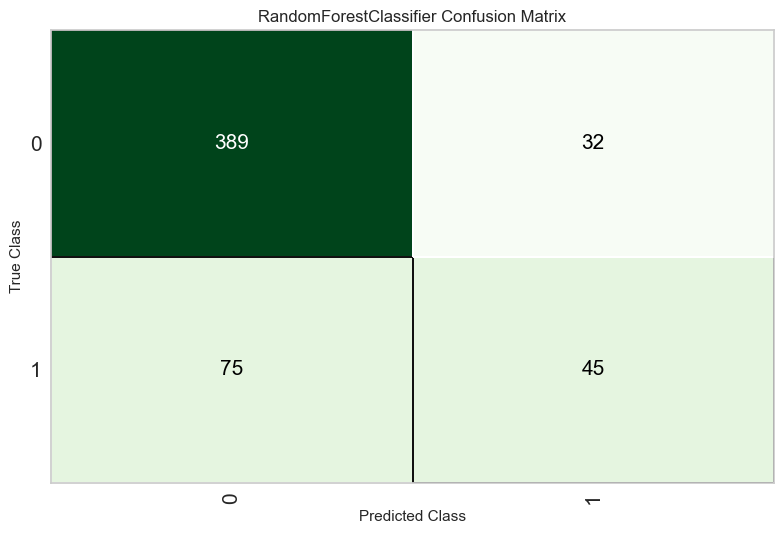

In [40]:
exp1.plot_model(rf, plot = 'confusion_matrix')

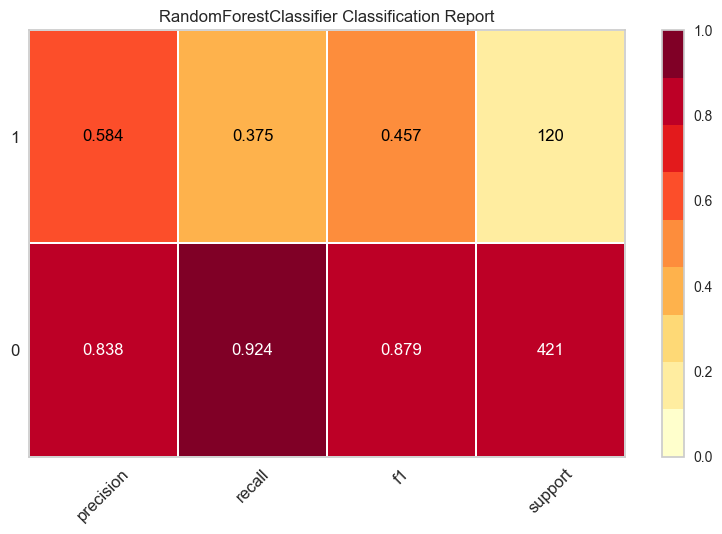

In [41]:
exp1.plot_model(rf, plot = 'class_report')

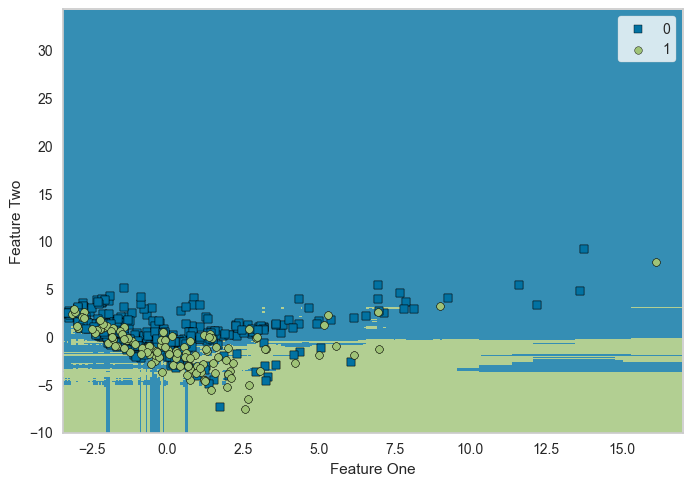

In [42]:
exp1.plot_model(rf, plot = 'boundary')

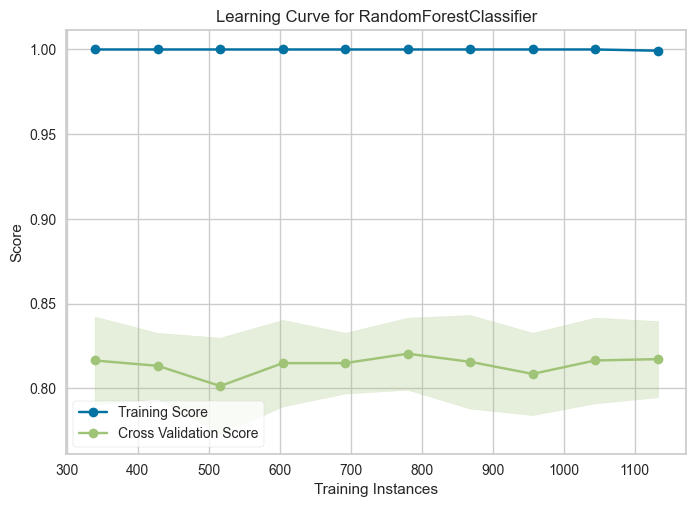

In [43]:
exp1.plot_model(rf, plot = 'learning')

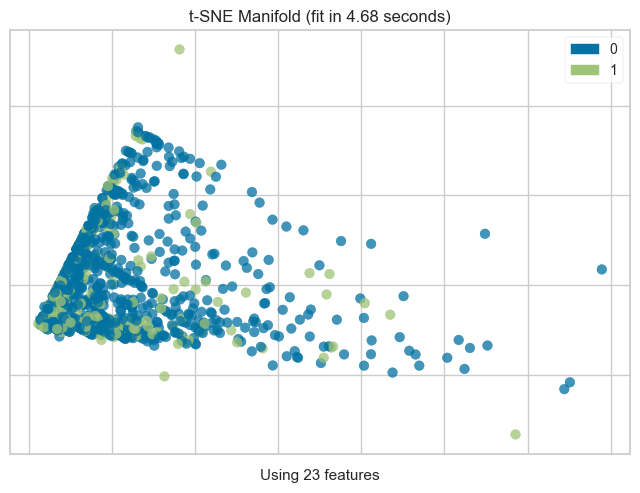

In [44]:
exp1.plot_model(rf, plot = 'manifold')


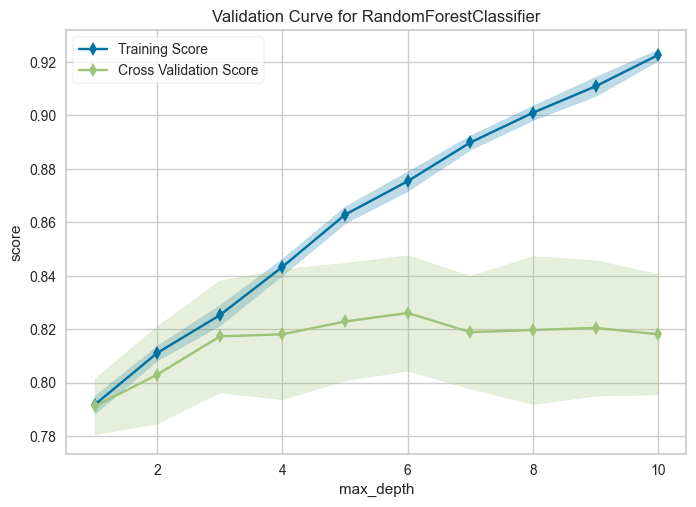

In [45]:
exp1.plot_model(rf, plot = 'vc')

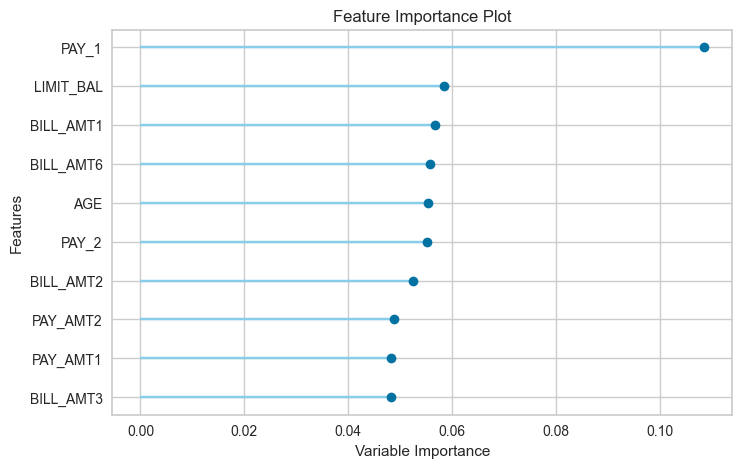

In [46]:
exp1.plot_model(rf, plot = 'feature')

## Model calibration

When performing classification you often not only want to predict the class label (outcome such as 0 or 1), but also obtain the probability of the respective outcome which provides a level of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some do not even support probability prediction. Well calibrated classifiers are probabilistic and provide outputs in the form of probabilities that can be directly interpreted as a confidence level. PyCaret allows you to calibrate the probabilities of a given model through the calibrate_model() function.

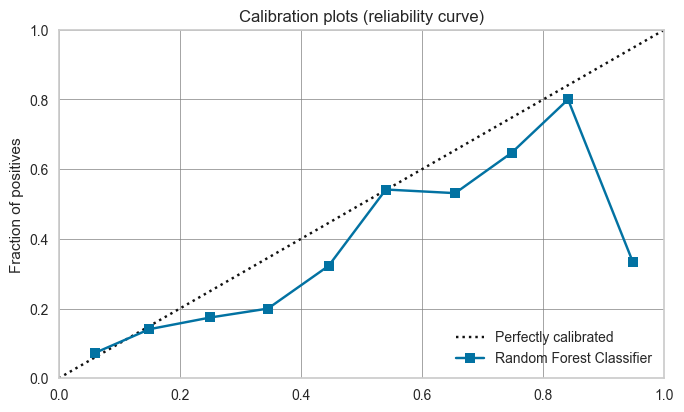

In [47]:
exp1.plot_model(rf, plot = 'calibration')

In [48]:
calibrated_rf = exp1.calibrate_model(rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.7504,0.1071,0.6000,0.1818,0.1227,0.1847
1,0.8413,0.7835,0.3571,0.8333,0.5000,0.4231,0.4769
2,0.8413,0.7919,0.3571,0.8333,0.5000,0.4231,0.4769
3,0.8016,0.7620,0.1429,0.8000,0.2424,0.1877,0.2825
4,0.8333,0.7256,0.3214,0.8182,0.4615,0.3844,0.4433
5,0.8016,0.6137,0.3214,0.6000,0.4186,0.3119,0.3340
6,0.8254,0.7471,0.2500,0.8750,0.3889,0.3219,0.4088
7,0.8333,0.6931,0.3929,0.7333,0.5116,0.4220,0.4519
8,0.7937,0.6713,0.2500,0.5833,0.3500,0.2500,0.2818


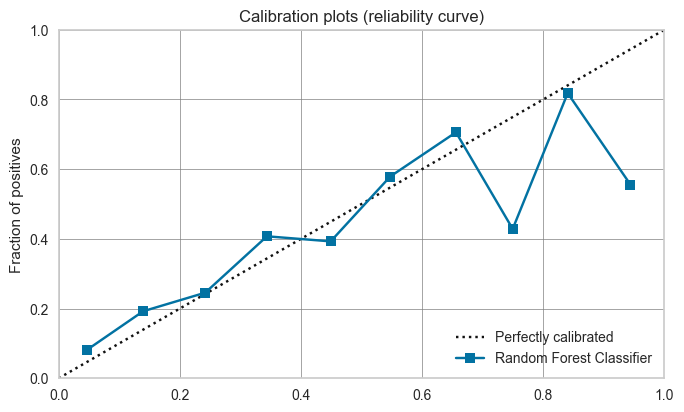

In [49]:
exp1.plot_model(calibrated_rf, plot='calibration')


Notice how different the above 2 plots look. One is before calibration and one is after. A perfectly calibrated classifier will follow the black dotted line in the above plots. the calibrated_rf is better!

## Evaluate model

This function displays a user interface for analyzing performance of a trained model. It calls the plot_model function internally.

*I don't recommend using this evaluate model functionality! very slow plus bugs! do separate plots instead.*

In [50]:
exp1.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Interpret model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (SHapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

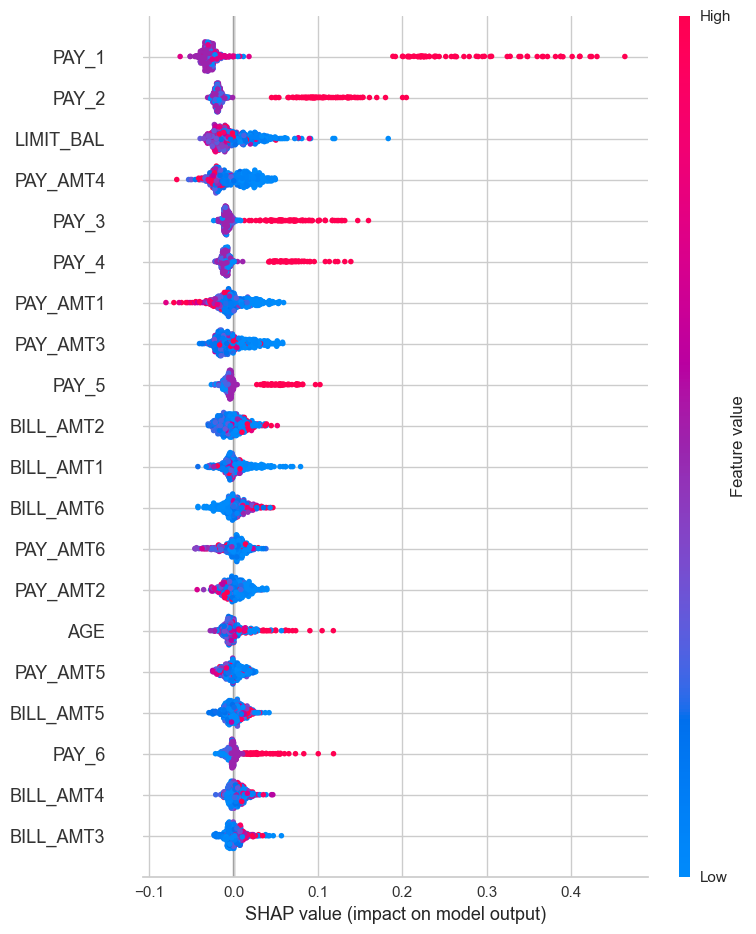

In [51]:
exp1.interpret_model(rf)

## Ensemble a Model
Ensembling is a common machine learning technique used to improve the performance of models (mostly tree based). There are various techniques for ensembling that we will cover in this section. These include Bagging and Boosting

In [52]:
# lets create a simple decision tree model that we will use for ensembling 
dt = exp1.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.5179,0.2500,0.2500,0.2500,0.0357,0.0357
1,0.7143,0.6250,0.4643,0.3824,0.4194,0.2322,0.2342
2,0.6905,0.5714,0.3571,0.3226,0.3390,0.1376,0.1379
3,0.6825,0.5760,0.3929,0.3235,0.3548,0.1469,0.1481
4,0.7143,0.5705,0.3214,0.3462,0.3333,0.1518,0.1520
5,0.7460,0.6582,0.5000,0.4375,0.4667,0.3010,0.3021
6,0.7937,0.7143,0.5714,0.5333,0.5517,0.4179,0.4183
7,0.7381,0.6117,0.3929,0.4074,0.4000,0.2326,0.2326
8,0.7540,0.6378,0.4286,0.4444,0.4364,0.2791,0.2791


In [53]:
bagged_dt = exp1.ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7460,0.6833,0.1786,0.3571,0.2381,0.1056,0.1147
1,0.8413,0.7505,0.4643,0.7222,0.5652,0.4737,0.4910
2,0.7937,0.7334,0.2857,0.5714,0.3810,0.2733,0.2970
3,0.8016,0.6959,0.2857,0.6154,0.3902,0.2902,0.3208
4,0.7698,0.6726,0.2857,0.4706,0.3556,0.2255,0.2359
5,0.7778,0.5840,0.3214,0.5000,0.3913,0.2632,0.2728
6,0.8095,0.7194,0.2857,0.6667,0.4000,0.3077,0.3468
7,0.8175,0.7214,0.4643,0.6190,0.5306,0.4202,0.4269
8,0.7540,0.5882,0.2857,0.4211,0.3404,0.1960,0.2015


In [54]:
boosted_dt = exp1.ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7540,0.5643,0.2143,0.4000,0.2791,0.1468,0.1572
1,0.8095,0.7343,0.4286,0.6000,0.5000,0.3864,0.3947
2,0.7778,0.6560,0.2500,0.5000,0.3333,0.2174,0.2362
3,0.7460,0.6616,0.1071,0.3000,0.1579,0.0464,0.0549
4,0.7857,0.6498,0.3214,0.5294,0.4000,0.2789,0.2918
5,0.7302,0.6352,0.4643,0.4062,0.4333,0.2573,0.2583
6,0.7857,0.7015,0.3214,0.5294,0.4000,0.2789,0.2918
7,0.7698,0.7177,0.3214,0.4737,0.3830,0.2478,0.2549
8,0.7381,0.5878,0.3214,0.3913,0.3529,0.1907,0.1922


## Blending and Stacking

* **Blend** is another common technique for ensembling that can be used in PyCaret. It uses predictions from multiple models to generate a final set of predictions using voting / majority consensus from all of the models passed in the estimator_list parameter. The method parameter can be used to define the type of voting. When set to hard, it uses labels for majority rule voting. When set to soft it uses the sum of predicted probabilities instead of the label. Default value of method is set to auto which means it tries to use soft method and fall back to hard if the former is not supported.


* **Stack** trains a meta model over select estimators passed in the estimator_list parameter. Stacking is another popular technique for ensembling but is less commonly implemented due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. Another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the predictions from those models as an input along with the original features. The implementation of stack_models() is based on Wolpert, D. H. (1992b). Stacked generalization


In [55]:
xgboost = exp1.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7540,0.7121,0.2857,0.4211,0.3404,0.1960,0.2015
1,0.8254,0.7569,0.5357,0.6250,0.5769,0.4677,0.4699
2,0.8095,0.7442,0.3929,0.6111,0.4783,0.3684,0.3819
3,0.8095,0.6975,0.2500,0.7000,0.3684,0.2848,0.3374
4,0.8016,0.6716,0.3214,0.6000,0.4186,0.3119,0.3340
5,0.7540,0.6177,0.2857,0.4211,0.3404,0.1960,0.2015
6,0.8571,0.7234,0.3929,0.9167,0.5500,0.4808,0.5419
7,0.8016,0.6742,0.3929,0.5789,0.4681,0.3516,0.3616
8,0.8016,0.6064,0.3571,0.5882,0.4444,0.3323,0.3477


In [57]:
top3_exp1

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=555, verbose=0, warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=555, su

In [58]:
top3_plus_xgboost = top3_exp1.copy()

In [60]:
top3_plus_xgboost.append(xgboost)

In [61]:
top3_plus_xgboost

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=555, verbose=0, warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=555, su

In [62]:
blender = exp1.blend_models(estimator_list = top3_plus_xgboost)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.7500,0.2500,0.5833,0.3500,0.2500,0.2818
1,0.8413,0.7697,0.5000,0.7000,0.5833,0.4886,0.4992
2,0.8254,0.7628,0.3571,0.7143,0.4762,0.3851,0.4185
3,0.8016,0.7540,0.2500,0.6364,0.3590,0.2671,0.3081
4,0.8333,0.6997,0.3571,0.7692,0.4878,0.4038,0.4463
5,0.7698,0.6195,0.2500,0.4667,0.3256,0.2018,0.2161
6,0.8571,0.7289,0.3929,0.9167,0.5500,0.4808,0.5419
7,0.8095,0.7150,0.3929,0.6111,0.4783,0.3684,0.3819
8,0.7857,0.6658,0.3571,0.5263,0.4255,0.2997,0.3082


In [63]:
blender

VotingClassifier(estimators=[('Random Forest Classifier',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=False...
                                            learning_rate=0.300000012,
                                            max_bin=256, max_cat_threshold=64,
                                            max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=1,
                                            objective='binary:logistic',
                                            predictor='auto', ...))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

Now that we have created a VotingRegressor using the blend_models() function. The model returned by the blend_models function is just like any other model that you would create using create_model() or tune_model(). You can use this model for predictions on unseen data using predict_model() in the same way you would for any other model.

In [64]:
blender.voting

'soft'

In [65]:
blender.estimators_

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=555, verbose=0, warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=555, su

In [66]:
stacker = exp1.stack_models(estimator_list=top3_plus_xgboost, restack=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.7336,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7778,0.6538,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7778,0.5641,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7778,0.5762,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7778,0.6152,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7778,0.6228,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7778,0.4927,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7778,0.6214,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7778,0.5117,0.0000,0.0000,0.0000,0.0000,0.0000


In [67]:
stacker

StackingClassifier(cv=5,
                   estimators=[('Random Forest Classifier',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                       n_jobs=-1,
                                                       oob_scor...
                                              objective='binary:logistic',
                                              predictor='auto', ...))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=555,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

Before we wrap up this section, there is another parameter in stack_models() that we haven't seen yet called restack. This parameter controls the ability to expose the raw data to the meta model. When set to True, it exposes the raw data to the meta model along with all the predictions of the base level models. By default it is set to True

## AutoML

This function returns the best model out of all trained models in current session based on the optimize parameter. Metrics evaluated can be accessed using the get_metrics function.

*I don't recommend doing it this way! very slow!*

In [68]:
# we already have top3_expr1, blender and stacker so far. Let's make tuned_top3_expr1 and pick the best one. 

tuned_top3_plus_xgboost = [exp1.tune_model(i) for i in top3_plus_xgboost]
best_AUC_model = exp1.automl(optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.6327,0.2857,0.8000,0.4211,0.3444,0.4080
1,0.8492,0.7117,0.4643,0.7647,0.5778,0.4926,0.5153
2,0.8175,0.6276,0.2857,0.7273,0.4103,0.3257,0.3757
3,0.8333,0.6378,0.2857,0.8889,0.4324,0.3636,0.4447
4,0.8095,0.6224,0.2857,0.6667,0.4000,0.3077,0.3468
5,0.7778,0.5893,0.2500,0.5000,0.3333,0.2174,0.2362
6,0.8571,0.6913,0.3929,0.9167,0.5500,0.4808,0.5419
7,0.8254,0.6582,0.3571,0.7143,0.4762,0.3851,0.4185
8,0.7937,0.5867,0.2143,0.6000,0.3158,0.2252,0.2668


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8175,0.8187,0.3214,0.6923,0.4390,0.3470,0.3835
1,0.8333,0.8027,0.3929,0.7333,0.5116,0.4220,0.4519
2,0.8175,0.7385,0.3571,0.6667,0.4651,0.3670,0.3930
3,0.8254,0.7116,0.2857,0.8000,0.4211,0.3444,0.4080
4,0.8175,0.7363,0.3214,0.6923,0.4390,0.3470,0.3835
5,0.8016,0.7307,0.3214,0.6000,0.4186,0.3119,0.3340
6,0.8254,0.7950,0.3214,0.7500,0.4500,0.3654,0.4119
7,0.8175,0.7398,0.3929,0.6471,0.4889,0.3858,0.4036
8,0.7937,0.6757,0.2857,0.5714,0.3810,0.2733,0.2970


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.6327,0.2857,0.8000,0.4211,0.3444,0.4080
1,0.8492,0.7117,0.4643,0.7647,0.5778,0.4926,0.5153
2,0.8175,0.6276,0.2857,0.7273,0.4103,0.3257,0.3757
3,0.8333,0.6378,0.2857,0.8889,0.4324,0.3636,0.4447
4,0.8095,0.6224,0.2857,0.6667,0.4000,0.3077,0.3468
5,0.7778,0.5893,0.2500,0.5000,0.3333,0.2174,0.2362
6,0.8571,0.6913,0.3929,0.9167,0.5500,0.4808,0.5419
7,0.8254,0.6582,0.3571,0.7143,0.4762,0.3851,0.4185
8,0.7937,0.5867,0.2143,0.6000,0.3158,0.2252,0.2668


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7698,0.7147,0.4286,0.4800,0.4528,0.3077,0.3085
1,0.8095,0.7325,0.6071,0.5667,0.5862,0.4627,0.4632
2,0.8095,0.7562,0.5714,0.5714,0.5714,0.4490,0.4490
3,0.7381,0.6669,0.2500,0.3684,0.2979,0.1441,0.1482
4,0.7302,0.6899,0.4286,0.4000,0.4138,0.2388,0.2390
5,0.7540,0.6873,0.5357,0.4545,0.4918,0.3309,0.3329
6,0.8492,0.7077,0.5000,0.7368,0.5957,0.5072,0.5216
7,0.7857,0.7179,0.5000,0.5185,0.5091,0.3721,0.3722
8,0.7302,0.6039,0.4286,0.4000,0.4138,0.2388,0.2390


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [69]:
best_AUC_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_samples_leaf=4,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=210, n_jobs=-1, oob_score=False,
                       random_state=555, verbose=0, warm_start=False)

## Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set.

note: so far, our best model is the blender model with the highest CV accuracy. :)


In [70]:
holdout_pred = exp1.predict_model(blender)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7948,0.7544,0.3333,0.5634,0.4188,0.3041,0.3195


## Finalize Model

This function trains a given estimator on the entire dataset including the holdout set.

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [71]:
final_model = exp1.finalize_model(blender)

In [72]:
final_model

Pipeline(memory=Memory(location=C:\Users\jahan\AppData\Local\Temp\joblib),
         steps=[('placeholder', None),
                ('actual_estimator',
                 VotingClassifier(estimators=[('Random Forest Classifier',
                                               RandomForestClassifier(bootstrap=True,
                                                                      ccp_alpha=0.0,
                                                                      class_weight=None,
                                                                      criterion='gini',
                                                                      max_depth=None,
                                                                      max_features='sqrt',
                                                                      max_leaf_nodes=None,
                                                                      max_samples=None,
                                                                      min_impurity_d...
                                                             learning_rate=0.300000012,
                                                             max_bin=256,
                                                             max_cat_threshold=64,
                                                             max_cat_to_onehot=4,
                                                             max_delta_step=0,
                                                             max_depth=6,
                                                             max_leaves=0,
                                                             min_child_weight=1,
                                                             missing=nan,
                                                             monotone_constraints='()',
                                                             n_estimators=100,
                                                             n_jobs=-1,
                                                             num_parallel_tree=1,
                                                             objective='binary:logistic',
                                                             predictor='auto', ...))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

### Final prediciton on unseen data

The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 10% of the original dataset which was never exposed to PyCaret.

In [73]:
unseen_predictions = exp1.predict_model(final_model, data=data_unseen)
unseen_predictions.tail()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8550,0.7624,0.4412,0.6000,0.5085,0.4257,0.4327


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
195,80000,2,3,1,39,0,0,0,0,0,...,62011.0,2900.0,2340.0,2300.0,2289.0,2500.0,1551.0,0,0,0.8227
196,60000,2,2,1,30,0,0,0,0,0,...,53059.0,2299.0,2232.0,2152.0,2226.0,1908.0,1933.0,1,0,0.8228
197,110000,2,1,2,29,0,0,0,0,0,...,18574.0,3000.0,2000.0,2049.0,2000.0,1000.0,1000.0,0,0,0.7469
198,360000,2,2,1,48,0,0,0,0,0,...,146511.0,9100.0,7300.0,5800.0,5600.0,5600.0,4100.0,0,0,0.7866
199,390000,1,1,1,44,-1,-1,-1,0,0,...,2798.0,4711.0,63701.0,1214.0,1241.0,2812.0,46220.0,0,0,0.8408


## Save Model

This function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [75]:
exp1.save_model(final_model, 'my_pycaret_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\jahan\AppData\Local\Temp\joblib),
          steps=[('placeholder', None),
                 ('actual_estimator',
                  VotingClassifier(estimators=[('Random Forest Classifier',
                                                RandomForestClassifier(bootstrap=True,
                                                                       ccp_alpha=0.0,
                                                                       class_weight=None,
                                                                       criterion='gini',
                                                                       max_depth=None,
                                                                       max_features='sqrt',
                                                                       max_leaf_nodes=None,
                                                                       max_samples=None,
                                                          

## Load model

This function loads a previously saved pipeline.



In [76]:
my_winning_classifier = load_model('my_pycaret_classifier')

Transformation Pipeline and Model Successfully Loaded


In [77]:
my_winning_classifier

Pipeline(memory=Memory(location=C:\Users\jahan\AppData\Local\Temp\joblib),
         steps=[('placeholder', None),
                ('actual_estimator',
                 VotingClassifier(estimators=[('Random Forest Classifier',
                                               RandomForestClassifier(bootstrap=True,
                                                                      ccp_alpha=0.0,
                                                                      class_weight=None,
                                                                      criterion='gini',
                                                                      max_depth=None,
                                                                      max_features='sqrt',
                                                                      max_leaf_nodes=None,
                                                                      max_samples=None,
                                                                      min_impurity_d...
                                                             learning_rate=0.300000012,
                                                             max_bin=256,
                                                             max_cat_threshold=64,
                                                             max_cat_to_onehot=4,
                                                             max_delta_step=0,
                                                             max_depth=6,
                                                             max_leaves=0,
                                                             min_child_weight=1,
                                                             missing=nan,
                                                             monotone_constraints='()',
                                                             n_estimators=100,
                                                             n_jobs=-1,
                                                             num_parallel_tree=1,
                                                             objective='binary:logistic',
                                                             predictor='auto', ...))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

## Deploy Model

This function deploys the transformation pipeline and trained model on cloud.

https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.deploy_model